In [1]:
# Time Series is a set of data measured over regular intervals of time
# By analyzing a time series, we can identify the pattern in data and develop a forecasting model using Machine Learning
# examplese of time series data are stocks, weather, patient health
# the data type of these time series in data frame are either 'datetime' or 'Timestamp'.


## Getting Stocks Data using yfinance

In [3]:
# yfinance helps to download stocks data from yahoo finance for special period of time as a time series


In [16]:
import yfinance as yf
import pandas as pd

In [7]:
# we can download real stock data from specific time period
# keeping end date is not necessary

df = yf.download('TATASTEEL.NS', start='2022-01-01',end = '2022-11-25')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,111.500000,115.099998,111.500000,114.245003,50.783611,38658030
2022-01-04,115.300003,115.970001,113.650002,114.879997,51.065876,59757310
2022-01-05,114.699997,118.080002,114.125000,117.760002,52.346085,61861760
2022-01-06,117.199997,118.300003,115.555000,116.324997,51.708202,53354000
2022-01-07,116.519997,117.400002,114.785004,116.035004,51.579296,39738570


In [12]:
# you can see the datatype ie Timestamp

type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

## Converting Dataset to Time Series

In [13]:
# if the date and time is in string type in df, we can changes it into Time Series

In [18]:
# pd.to_datetime is used to time stamp

df.index = pd.to_datetime(df.index)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,111.500000,115.099998,111.500000,114.245003,50.783611,38658030
2022-01-04,115.300003,115.970001,113.650002,114.879997,51.065876,59757310
2022-01-05,114.699997,118.080002,114.125000,117.760002,52.346085,61861760
2022-01-06,117.199997,118.300003,115.555000,116.324997,51.708202,53354000
2022-01-07,116.519997,117.400002,114.785004,116.035004,51.579296,39738570
...,...,...,...,...,...,...
2022-11-23,105.699997,106.000000,104.949997,105.449997,105.449997,22809651
2022-11-24,105.849998,105.949997,104.599998,105.500000,105.500000,23737867
2022-11-25,105.599998,106.500000,105.099998,106.199997,106.199997,27361785


In [19]:
# sometimes date time column may contain values like AM / PM as string
# then to_datetime will give error
# then we need to do formating

In [28]:
df = pd.read_csv(r"D:\Courses\New folder\Courses\Data Manipulation in Python Master Python, Numpy & Pandas\Resources\ETH_1h.csv")
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [29]:
type(df['Date'][0])

str

In [30]:
df['Date']=pd.to_datetime(df['Date'])

ParserError: Unknown string format: 2020-03-13 08-PM

In [31]:
# you can see the error

In [32]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %I-%p')
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [35]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
# now you can see the datatype as Time Stamp

## Working with TIme Series

In [37]:
df = yf.download('TATASTEEL.NS', start='2022-01-01',end = '2022-11-25')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,111.500000,115.099998,111.500000,114.245003,50.783611,38658030
2022-01-04,115.300003,115.970001,113.650002,114.879997,51.065876,59757310
2022-01-05,114.699997,118.080002,114.125000,117.760002,52.346085,61861760
2022-01-06,117.199997,118.300003,115.555000,116.324997,51.708202,53354000
2022-01-07,116.519997,117.400002,114.785004,116.035004,51.579296,39738570
...,...,...,...,...,...,...
2022-11-18,105.849998,106.300003,104.699997,105.500000,105.500000,28992538
2022-11-21,107.699997,107.699997,103.849998,104.250000,104.250000,58404309
2022-11-22,104.400002,105.400002,103.550003,105.199997,105.199997,27846186


In [42]:
df.index=pd.to_datetime(df.index)

In [43]:
day = pd.to_datetime('2022, 1 ,1')
day.day_name()

'Saturday'

In [48]:
# here we are using index , because in our df index is 'Date' column

df.index.min()

Timestamp('2022-01-03 00:00:00')

In [49]:
df.index.max()

Timestamp('2022-11-24 00:00:00')

In [50]:
timeperiod = df.index.max() - df.index.min()
timeperiod

Timedelta('325 days 00:00:00')

In [55]:
# we get all the data in 2022 february

df.loc['2022, 2']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,110.489998,117.445000,108.639999,116.735001,51.890457,170752680
2022-02-02,117.989998,117.989998,115.830002,116.750000,51.897121,75247340
2022-02-03,115.300003,118.169998,114.629997,116.660004,51.857117,65140900
2022-02-04,117.379997,119.775002,117.025002,117.629997,52.288292,93174180
2022-02-07,116.830002,121.459999,116.099998,118.300003,52.586121,145105250
2022-02-08,119.500000,122.239998,117.150002,121.959999,54.213043,140839840
2022-02-09,123.099998,123.400002,120.815002,122.235001,54.335285,73520600
2022-02-10,123.000000,125.425003,122.599998,124.834999,55.491024,93920570
2022-02-11,123.900002,126.495003,123.309998,125.445000,55.762177,96762260


In [54]:
df.loc['2022, 2, 1']

Open         1.104900e+02
High         1.174450e+02
Low          1.086400e+02
Close        1.167350e+02
Adj Close    5.189046e+01
Volume       1.707527e+08
Name: 2022-02-01 00:00:00, dtype: float64

## Visualizing Time Series

In [73]:
import matplotlib.pyplot as plt
import numpy as np

[*********************100%***********************]  1 of 1 completed


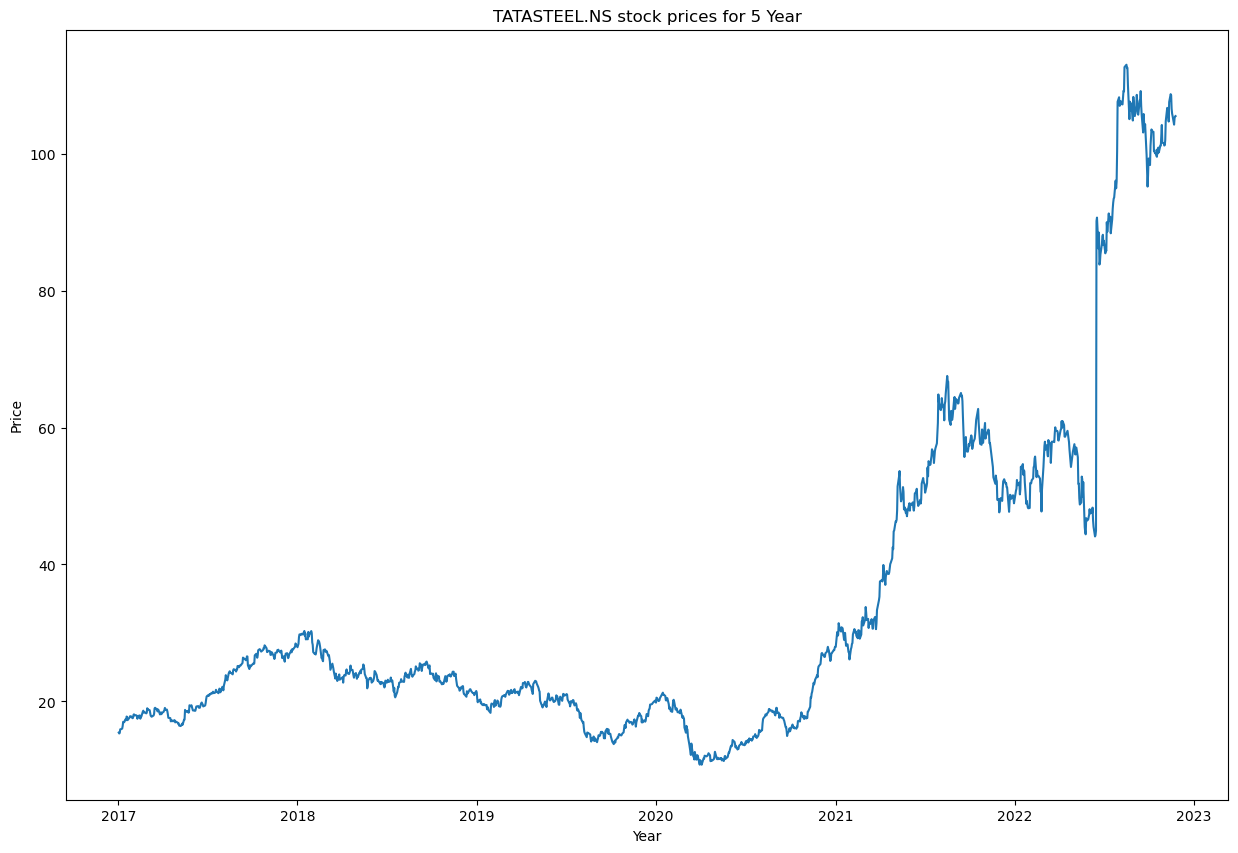

In [78]:
df = yf.download('TATASTEEL.NS', start='2017-01-01',end = '2022-11-25')
plt.figure(figsize = (15,10))
plt.title('TATASTEEL.NS stock prices for 5 Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(df['Adj Close'])

In [79]:
df.index[0].year

2017

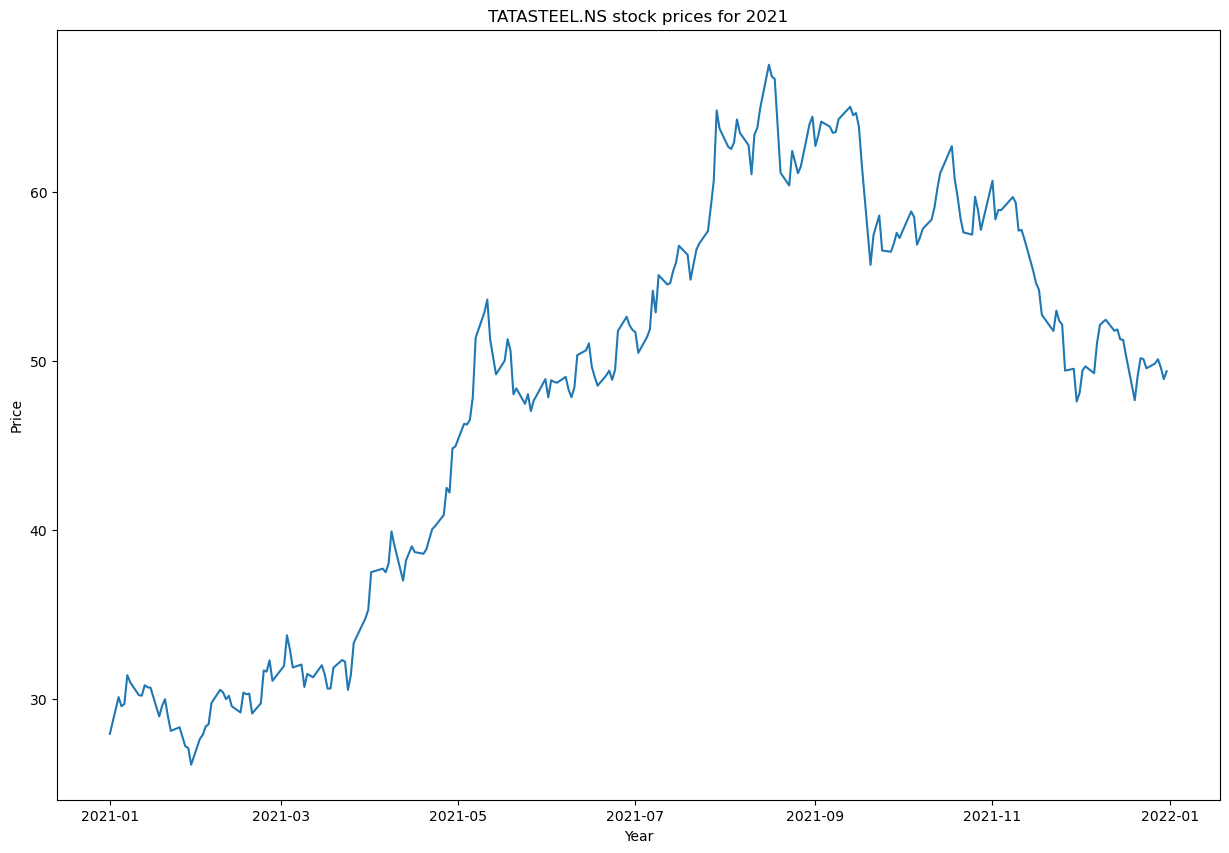

In [83]:
#for getting only specific year using loc

plt.figure(figsize = (15,10))
plt.title('TATASTEEL.NS stock prices for 2021')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(df.loc['2021']['Adj Close'])